Return and volatility interrelationships between Select Sector SPDR Funds and SP500 - An Exploratory Study

_Kumar Shantanu_

# Abstract
The following paper examines the return and volatility interrelationships between the select sectors of S&P500 and presents the following stylized facts:
1. A higher monthly return correlation with S&P 500 also implies a higher volatility correlation with S&P 500 for select sector ETFs.
2. The Industrial Select Sector has the maximum correlation with S&P 500 for both the monthly returns and volatility with the market. It is followed by the The Consumer Discretionary Select Sector.
3. The Utilities Select Sector has lowest correlation with S&P 500 for both the monthly returns and volatility with the market.
4. The Energy Select Sector has relatively lower correlation with all the other sectors as well as the S&P 500.

# Definitions
## Select Sector SPDR Funds
The Select Sector SPDR Funds are considered to be a type of index fund that allows for the segregation of the benchmark S&P 500 index into distinct and individualized industry sectors. This enables investors to attain partial ownership in specified groups of industries, as represented by a particular Select Sector Index. The mechanism for investing in these funds is similar to that of purchasing a stock, whereby a single share provides access to any of the ten major industry sectors that are included within the S&P 500. It is important to note that the shares of the Select Sector SPDR Funds differ significantly from those of conventional mutual funds. [1]

The S&P 500 has the following select sectors ETFs: [1]

| Sector                                             | Ticker |
| -------------------------------------------------- | ------ |
| The Consumer Discretionary Select Sector SPDR Fund | XLY    |
| The Consumer Staples Select Sector SPDR Fund       | XLP    |
| The Energy Select Sector SPDR Fund                 | XLE    |
| The Financial Select Sector SPDR Fund              | XLF    |
| The Health Care Select Sector SPDR Fund            | XLV    |
| The Industrial Select Sector SPDR Fund             | XLI    |
| The Materials Select Sector SPDR Fund              | XLB    |
| The Real Estate Select Sector SPDR Fund            | XLRE   |
| The Technology Select Sector SPDR Fund             | XLK    |
| The Utilities Select Sector SPDR Fund              | XLU    |

## S&P 500 
We will use S&P 500 index to benchmark each of these sectors to the overall market return. Esentially, we will compare the monthly returns of each of these sectoral ETFs to the market return to gather insights about correlatiobns and volatility. 

## Correlation Matrix

In order to define the correlation matrix, we first need to fundamentally define the concepts of variance and covariance for a vector of random variables.[2]

### Variance
The variance is a statistical measure of dispersion that provides information regarding the extent to which the data values deviate from the mean.

The computation of variance involves the calculation of the average of the squared deviations between each data value and the mean. In mathematical terms, the variance is obtained by calculating the expected value of the squared deviation of each data point from the mean. The mean acts as a reference point, and the squared deviation from the mean represents the distance of each data point from the central tendency of the data distribution. Thus, the variance provides an assessment of the degree of spread or dispersion of the data values around the mean.

$$\sigma^2=\frac{1}{n-1} \sum_{i=1}^n\left(x_i-\bar{x}\right)\left(x_i-\bar{x}\right)$$

### Covariance
Covariance measures the variance between two variables. In the scenario where a dataset consists of two features, the aim is to describe the relationship between the variables. In this context, the concept of covariance serves as a useful tool to measure the inter-dependence between the two variables.

The calculation of covariance is a slight modification of the equation used to compute the variance. It involves the calculation of the variance between the two variables, providing a measure of the linear relationship between the variables. By calculating the covariance, it is possible to determine the degree to which the two variables move in tandem and to what extent changes in one variable are associated with changes in the other variable. The covariance is a scalar value that summarizes the linear relationship between the two variables and provides valuable information for understanding the structure of the data.

$$C_{x, y}=\frac{1}{n-1} \sum_{i=1}^n\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)$$

### Covariance Matrix
The covariance matrix is a square matrix that has a symmetric structure, with each feature represented along both its rows and columns. The diagonal elements of the matrix correspond to the variance of individual features, while the non-diagonal entries represent the covariance between the different features. The covariance matrix provides a comprehensive representation of the relationships between the variables and can be used to quantify the relationship between the different features.

$$C(x, y, z)=\left[\begin{array}{ccc}
\operatorname{var}_x & \operatorname{covar}_{x, y} & \operatorname{covar}_{x, z} \\
\operatorname{covar}_{y, x} & \operatorname{var}_y & \operatorname{covar}_{y, z} \\
\operatorname{covar}_{z, x} & \operatorname{covar}_{z, y} & \operatorname{var}_z
\end{array}\right]$$

Once these covariances are standardized by dividign them with respective standard deviations, it becomes the correlation matrix.


# Technical Methodology

The data is taken from AlphaVantage API. 'Polars' library is used to clean and manipulate data rather than Pandas because of its higher speed and efficiency compared to Pandas. Seaborn and Matblotlib are used for visualization.

## Importing libraries, defining functions and classes

In [1]:
import requests
import polars as pl
from datetime import datetime
from dataclasses import dataclass

class getDatafromAPI ():  
  """
  This class is used to get data from the Alpha Vantage API    
  """
  def __init__(self) -> None:
     self._api_key = "M5VLV21IZ3B7QQDX"

  def map_dict_to_list(self, dict_obj: dict, ticker: str) -> dict:
    result = {}
    keys = list(dict_obj.keys())
    result['ticker'] = [ticker]*len(keys)
    result['date'] = [datetime.strptime(key, '%Y-%m-%d') for key in keys]
    for key in dict_obj[keys[0]]:
      result[key] = [dict_obj[k][key] for k in keys]
    return result

  def cleanData (getFunction):
      def cleaner (self, symbol, function):  
          ticker, data = getFunction(self, symbol, function)        
          df = pl.from_dict(self.map_dict_to_list(data, ticker)).sort('date').with_columns(pl.exclude(['date', 'ticker']).cast(pl.Float32))
          df = df.with_columns([
              (pl.col('5. adjusted close') / pl.col('5. adjusted close').shift(1) - 1).alias('monthlyReturn')
          ]).drop_nulls()
          return df        
      return cleaner
    
  @cleanData
  def getAlphaVantageData (self, symbol, function):
      url = f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&apikey={self._api_key}'
      r = requests.get(url)
      response = r.json()
      return (response['Meta Data']['2. Symbol'], response['Monthly Adjusted Time Series'])       
    
@dataclass
class dataWarehouse():
  """
  This class is used to store the data from the API as a polars dataframe.
  """
  pass

getter = getDatafromAPI()
warehouse = dataWarehouse() 

## Reading the select sectors tickers from the csv file

In [56]:
# Read a two column CSV file into dictionary
lines = open('select_sectors.csv').read().splitlines()
select_sectors = {key:value for value, key in [line.split(",") for line in lines]}
select_sectors

{'XLY': 'The Consumer Discretionary Select Sector SPDR Fund',
 'XLP': 'The Consumer Staples Select Sector SPDR Fund',
 'XLE': 'The Energy Select Sector SPDR Fund',
 'XLF': 'The Financial Select Sector SPDR Fund',
 'XLV': 'The Health Care Select Sector SPDR Fund',
 'XLI': 'The Industrial Select Sector SPDR Fund',
 'XLB': 'The Materials Select Sector SPDR Fund',
 'XLRE': 'The Real Estate Select Sector SPDR Fund',
 'XLK': 'The Technology Select Sector SPDR Fund',
 'XLU': 'The Utilities Select Sector SPDR Fund'}

## Getting the data

The following code will get the data from the API and store it in the data warehouse. There is a function to handle the API limit.

In [6]:
import time
tickers = list(select_sectors.keys())
tickers.append('SPY')  
def handleProblematicTicker(ticker, wait=61):
  print(f"Unable to retrieve ticker:{ticker}")
  print(f"Retrying after {wait} seconds") #API has a limit of 5 calls per minute
  time.sleep(wait)
  setattr(warehouse, ticker, getter.getAlphaVantageData(ticker, 'TIME_SERIES_MONTHLY_ADJUSTED'))

In [7]:
for ticker in tickers: 
    print(f"Retrieving ticker:{ticker}")
    try:    
        setattr(warehouse, ticker, getter.getAlphaVantageData(ticker, 'TIME_SERIES_MONTHLY_ADJUSTED'))
    except:
        handleProblematicTicker(ticker)     

Retrieving ticker:XLY
Unable to retrieve ticker:XLY
Retrying after 61 seconds
Retrieving ticker:XLP
Retrieving ticker:XLE
Retrieving ticker:XLF
Retrieving ticker:XLV
Retrieving ticker:XLI
Unable to retrieve ticker:XLI
Retrying after 61 seconds
Retrieving ticker:XLB
Retrieving ticker:XLRE
Retrieving ticker:XLK
Retrieving ticker:XLU
Retrieving ticker:SPY
Unable to retrieve ticker:SPY
Retrying after 61 seconds


The Real Estate Select Sector SPDR Fund is removed from the list of tickers because it has data only from 2015.

In [8]:
tickers.remove('XLRE') # This ticker has data beginning from 2015

The following code creates columns for monthly returns for each ticker and joins it to the dataframe.

In [39]:
data = getattr(warehouse, tickers[0]).select(['date','monthlyReturn'])
for ticker in tickers[1:]:
  data = data.join(getattr(warehouse, ticker).select(['date', 'monthlyReturn']), on='date', how='left', suffix=f'_{ticker}')
data = data.with_columns(pl.col('monthlyReturn').alias(f'monthlyReturn_{tickers[0]}')).select(pl.exclude(['monthlyReturn']))

Similarly, The following code creates columns for the volatility of monthly returns for each ticker and joins it to the dataframe. Note that the volatility is measured by 24-month rolling standard deviation.

In [40]:
# Calculate volatility of monthly returns
for ticker in tickers:
  data = data.join(data.select(['date',f'monthlyReturn_{ticker}']).with_columns(pl.col(f'monthlyReturn_{ticker}').rolling_std(24).alias(f'rollingStd_{ticker}')).select(['date',f'rollingStd_{ticker}']).select(['date',f'rollingStd_{ticker}']), on="date")

The following code separates the volatility and returns into two dataframes. 

In [70]:
AdjClose =  getattr(warehouse, tickers[0]).select(['date','5. adjusted close'])
for ticker in tickers[1:]:
  AdjClose = AdjClose.join(getattr(warehouse, ticker).select(['date', '5. adjusted close']), on='date', how='left', suffix=f'_{ticker}')
AdjClose = AdjClose.with_columns(pl.col('5. adjusted close').alias(f'5. adjusted close_{tickers[0]}')).select(pl.exclude(['5. adjusted close']))

In [42]:
volatility = data.select(['date']+[f"rollingStd_{ticker}" for ticker in tickers]).drop_nulls()

In [47]:
monthlyReturns = data.select(['date']+[f"monthlyReturn_{ticker}" for ticker in tickers]).drop_nulls()

# Insights from Data

Next, we plot how the volatility of the monthly returns has changed over time.

Text(0.5, 1.0, 'Adjusted Close for Energy Select Sector')

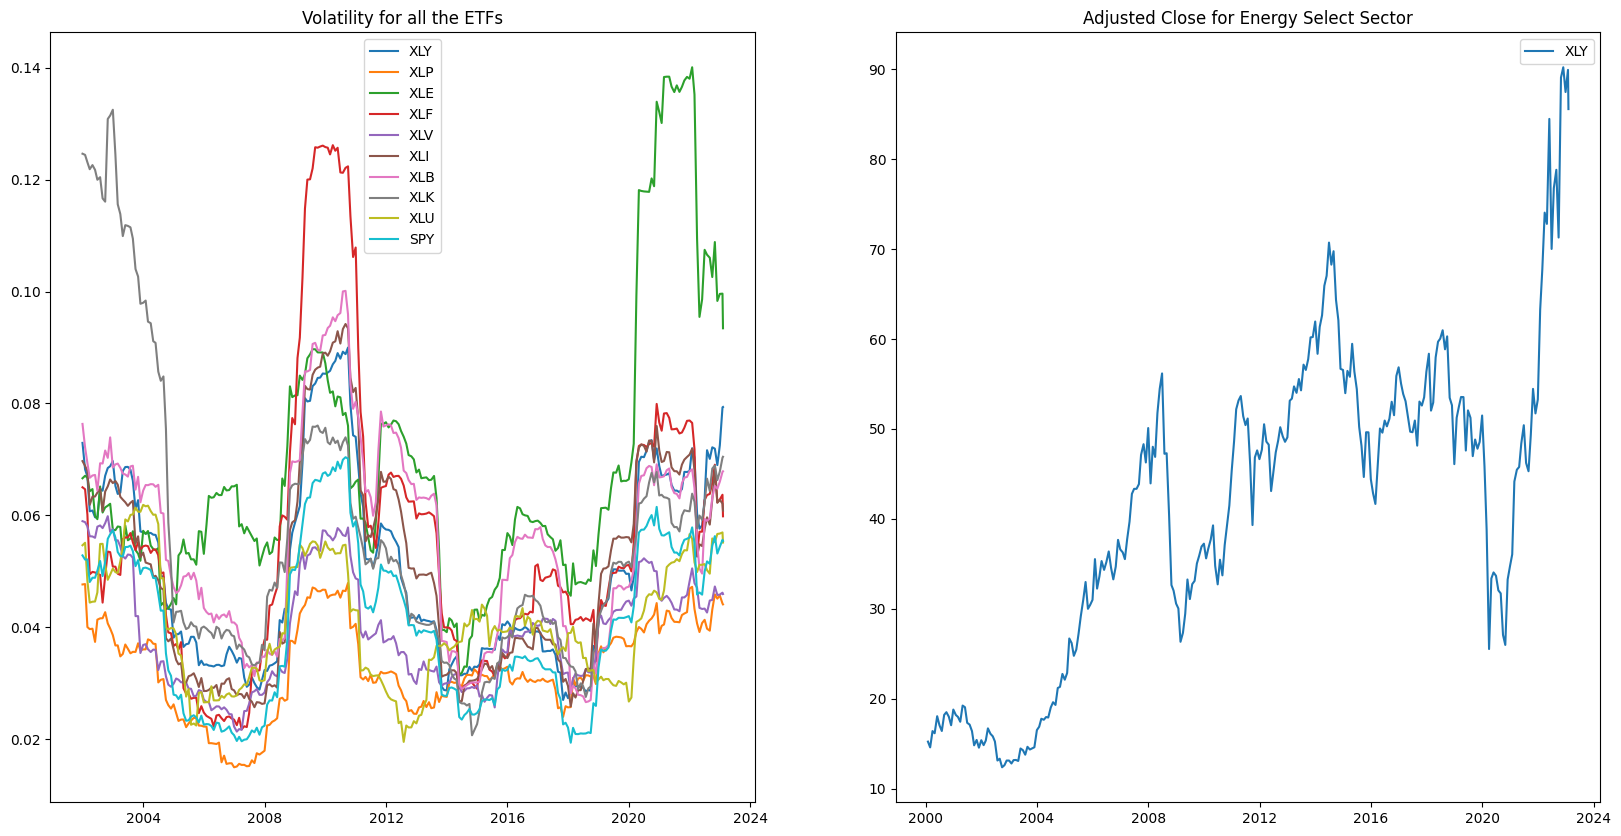

In [85]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(volatility['date'], volatility.select(pl.exclude('date')))
ax[1].plot(monthlyReturns['date'], AdjClose.select('5. adjusted close_XLE'))
ax[0].legend(tickers)
ax[1].legend(tickers)
ax[0].set_title('Volatility for all the ETFs')
ax[1].set_title('Adjusted Close for Energy Select Sector')

The first apparent thing is that there is a increase in volatility in the last 2 years. We find a phenomenal increase in volatility for the Energy Select Sector during the recent times. There is also an increase in the prices of energy select sector.

Now let us examine the correlations by plotting a corelation heatmap.

In [52]:
import seaborn as sns 

def draw_correlation_heatmap(data, title, removeDate=True):
    data = data.select(pl.exclude('date')).pearson_corr()
    ax = sns.heatmap(
        data, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.color_palette("RdBu_r", 100),
        square=True,
        annot=True,
    )

    ax.set_yticklabels(
        data.columns,
        rotation=360,
    )


    ax.set_xticklabels(
        data.columns,
        rotation=45,
        horizontalalignment='right')

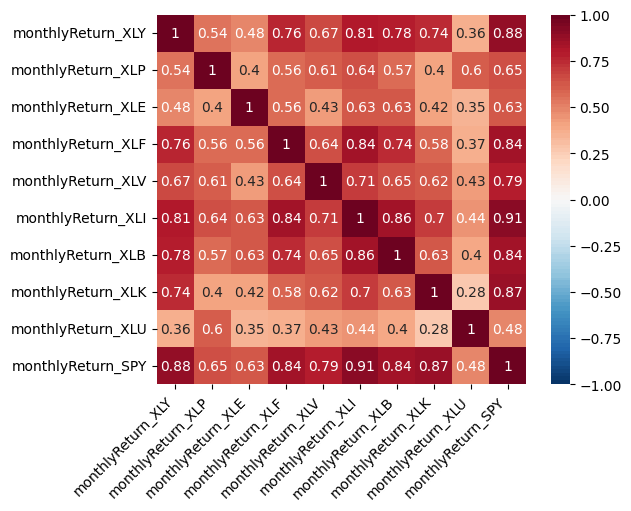

In [53]:
draw_correlation_heatmap(monthlyReturns, "Correlation of monthly returns")

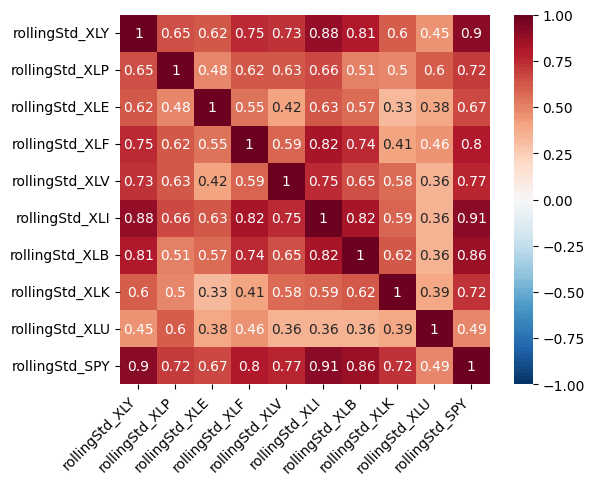

In [26]:
draw_heatmap(volatility.select(pl.exclude('date')).pearson_corr(), "Volatility Correlation")

We find that:
1. A higher monthly return correlation with S&P 500 also implies a higher volatility correlation with S&P 500 for select sector ETFs.
2. The Industrial Select Sector has the maximum correlation with S&P 500 for both the monthly returns and volatility with the market. It is followed by the The Consumer Discretionary Select Sector.
3. The Utilities Select Sector has lowest correlation with S&P 500 for both the monthly returns and volatility with the market.
4. The Energy Select Sector has relatively lower correlation with all the other sectors as well as the S&P 500.  

## Citations
1. "THE SELECT SECTOR SPDR® TRUST." Https://www.Sec.Gov/, 30 Sept. 2017, www.sec.gov/. Accessed 5 Feb. 2023.

2. Reichel, L. (n.d.). Random Vectors and the Variance–Covariance Matrix. Retrieved February 7, 2023, from http://www.math.kent.edu/~reichel/courses/monte.carlo/alt4.7d.pdf